# Linear Regression Model

In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Import data
price_data = pd.read_csv("../data/merged_games_df.csv")

In [3]:
price_data

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Console,Game Title,Price,Mean,Median
0,ADVENTURES OF TRON,2600,1981,Action,Mattel Interactive,630000.0,30000.0,NaN,10000.0,670000,2600,ADVENTURES OF TRON,16.10,False,False
1,AIRLOCK,2600,1981,Action,Data Age,360000.0,20000.0,NaN,NaN,390000,2600,AIRLOCK,17.00,False,False
2,ALIEN,2600,1981,Action,20th Century Fox Video Games,740000.0,40000.0,NaN,10000.0,790000,2600,ALIEN,61.24,True,True
3,ARMOR AMBUSH,2600,1981,Action,Mattel Interactive,150000.0,10000.0,NaN,NaN,170000,2600,ARMOR AMBUSH,9.92,False,False
4,ASTEROIDS,2600,1980,Shooter,Atari,4000000.0,260000.0,NaN,50000.0,4310000,2600,ASTEROIDS,14.06,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1278,SUPER STREET FIGHTER II,SNES,1993,Fighting,Nintendo,520000.0,160000.0,1290000.0,30000.0,2000000,SNES,SUPER STREET FIGHTER II,67.97,True,True
1279,TEENAGE MUTANT NINJA TURTLES TOURNAMENT FIGHTERS,SNES,1992,Fighting,Konami Digital Entertainment,NaN,NaN,60000.0,NaN,60000,SNES,TEENAGE MUTANT NINJA TURTLES TOURNAMENT FIGHTERS,108.57,True,True
1280,TETRIS ATTACK,SNES,1995,Puzzle,Nintendo,NaN,NaN,150000.0,NaN,150000,SNES,TETRIS ATTACK,36.19,False,True
1281,UN SQUADRON,SNES,1991,Shooter,Capcom,NaN,NaN,120000.0,NaN,120000,SNES,UN SQUADRON,84.06,True,True


In [4]:
# Make all the NAN values "0"
fill_zero = price_data.fillna(0)

In [5]:
# Change the floats to integers
fill_zero['NA_Sales'] = fill_zero['NA_Sales'].apply(np.int64)
fill_zero['EU_Sales'] = fill_zero['EU_Sales'].apply(np.int64)
fill_zero['JP_Sales'] = fill_zero['JP_Sales'].apply(np.int64)
fill_zero['Global_Sales'] = fill_zero['Global_Sales'].apply(np.int64)
fill_zero['Other_Sales'] = fill_zero['Other_Sales'].apply(np.int64)
fill_zero['Price'] = fill_zero['Price'].apply(np.int64)

In [6]:
fill_zero.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1283 entries, 0 to 1282
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          1283 non-null   object
 1   Platform      1283 non-null   object
 2   Year          1283 non-null   int64 
 3   Genre         1283 non-null   object
 4   Publisher     1283 non-null   object
 5   NA_Sales      1283 non-null   int64 
 6   EU_Sales      1283 non-null   int64 
 7   JP_Sales      1283 non-null   int64 
 8   Other_Sales   1283 non-null   int64 
 9   Global_Sales  1283 non-null   int64 
 10  Console       1283 non-null   object
 11  Game Title    1283 non-null   object
 12  Price         1283 non-null   int64 
 13  Mean          1283 non-null   bool  
 14  Median        1283 non-null   bool  
dtypes: bool(2), int64(7), object(6)
memory usage: 132.9+ KB


## Encoding the Categorical Data

In [7]:
# Label Encode the Platform and Genre columns
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(fill_zero["Platform"])
fill_zero["Platform"]= le.transform(fill_zero["Platform"])

In [8]:
le.fit(fill_zero["Genre"])
fill_zero["Genre"]= le.transform(fill_zero["Genre"])

In [9]:
fill_zero

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Console,Game Title,Price,Mean,Median
0,ADVENTURES OF TRON,0,1981,0,Mattel Interactive,630000,30000,0,10000,670000,2600,ADVENTURES OF TRON,16,False,False
1,AIRLOCK,0,1981,0,Data Age,360000,20000,0,0,390000,2600,AIRLOCK,17,False,False
2,ALIEN,0,1981,0,20th Century Fox Video Games,740000,40000,0,10000,790000,2600,ALIEN,61,True,True
3,ARMOR AMBUSH,0,1981,0,Mattel Interactive,150000,10000,0,0,170000,2600,ARMOR AMBUSH,9,False,False
4,ASTEROIDS,0,1980,8,Atari,4000000,260000,0,50000,4310000,2600,ASTEROIDS,14,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1278,SUPER STREET FIGHTER II,7,1993,2,Nintendo,520000,160000,1290000,30000,2000000,SNES,SUPER STREET FIGHTER II,67,True,True
1279,TEENAGE MUTANT NINJA TURTLES TOURNAMENT FIGHTERS,7,1992,2,Konami Digital Entertainment,0,0,60000,0,60000,SNES,TEENAGE MUTANT NINJA TURTLES TOURNAMENT FIGHTERS,108,True,True
1280,TETRIS ATTACK,7,1995,5,Nintendo,0,0,150000,0,150000,SNES,TETRIS ATTACK,36,False,True
1281,UN SQUADRON,7,1991,8,Capcom,0,0,120000,0,120000,SNES,UN SQUADRON,84,True,True


In [10]:
encoded_df = fill_zero.rename(columns={"Platform": "Platform LabelCode", "Genre": "Genre LabelCode"})
encoded_df

,Name,Platform LabelCode,Year,Genre LabelCode,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Console,Game Title,Price,Mean,Median
0,ADVENTURES OF TRON,0,1981,0,Mattel Interactive,630000,30000,0,10000,670000,2600,ADVENTURES OF TRON,16,False,False
1,AIRLOCK,0,1981,0,Data Age,360000,20000,0,0,390000,2600,AIRLOCK,17,False,False
2,ALIEN,0,1981,0,20th Century Fox Video Games,740000,40000,0,10000,790000,2600,ALIEN,61,True,True
3,ARMOR AMBUSH,0,1981,0,Mattel Interactive,150000,10000,0,0,170000,2600,ARMOR AMBUSH,9,False,False
4,ASTEROIDS,0,1980,8,Atari,4000000,260000,0,50000,4310000,2600,ASTEROIDS,14,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1278,SUPER STREET FIGHTER II,7,1993,2,Nintendo,520000,160000,1290000,30000,2000000,SNES,SUPER STREET FIGHTER II,67,True,True
1279,TEENAGE MUTANT NINJA TURTLES TOURNAMENT FIGHTERS,7,1992,2,Konami Digital Entertainment,0,0,60000,0,60000,SNES,TEENAGE MUTANT NINJA TURTLES TOURNAMENT FIGHTERS,108,True,True
1280,TETRIS ATTACK,7,1995,5,Nintendo,0,0,150000,0,150000,SNES,TETRIS ATTACK,36,False,True
1281,UN SQUADRON,7,1991,8,Capcom,0,0,120000,0,120000,SNES,UN SQUADRON,84,True,True


In [11]:
platform_ohe = pd.get_dummies(encoded_df["Platform LabelCode"], prefix="Platform")
platform_ohe

,Platform_0,Platform_1,Platform_2,Platform_3,Platform_4,Platform_5,Platform_6,Platform_7
0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
1278,0,0,0,0,0,0,0,1
1279,0,0,0,0,0,0,0,1
1280,0,0,0,0,0,0,0,1
1281,0,0,0,0,0,0,0,1


In [12]:
genre_ohe = pd.get_dummies(encoded_df["Genre LabelCode"], prefix="Genre")
genre_ohe

,Genre_0,Genre_1,Genre_2,Genre_3,Genre_4,Genre_5,Genre_6,Genre_7,Genre_8,Genre_9,Genre_10,Genre_11
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1278,0,0,1,0,0,0,0,0,0,0,0,0
1279,0,0,1,0,0,0,0,0,0,0,0,0
1280,0,0,0,0,0,1,0,0,0,0,0,0
1281,0,0,0,0,0,0,0,0,1,0,0,0


In [13]:
pricesWithEncode = encoded_df.join(platform_ohe, how='left', sort=False)
pricesWithEncode2 = pricesWithEncode.join(genre_ohe, how='left', sort=False)
pricesWithEncode2

,Name,Platform LabelCode,Year,Genre LabelCode,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,...,Genre_2,Genre_3,Genre_4,Genre_5,Genre_6,Genre_7,Genre_8,Genre_9,Genre_10,Genre_11
0,ADVENTURES OF TRON,0,1981,0,Mattel Interactive,630000,30000,0,10000,670000,...,0,0,0,0,0,0,0,0,0,0
1,AIRLOCK,0,1981,0,Data Age,360000,20000,0,0,390000,...,0,0,0,0,0,0,0,0,0,0
2,ALIEN,0,1981,0,20th Century Fox Video Games,740000,40000,0,10000,790000,...,0,0,0,0,0,0,0,0,0,0
3,ARMOR AMBUSH,0,1981,0,Mattel Interactive,150000,10000,0,0,170000,...,0,0,0,0,0,0,0,0,0,0
4,ASTEROIDS,0,1980,8,Atari,4000000,260000,0,50000,4310000,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1278,SUPER STREET FIGHTER II,7,1993,2,Nintendo,520000,160000,1290000,30000,2000000,...,1,0,0,0,0,0,0,0,0,0
1279,TEENAGE MUTANT NINJA TURTLES TOURNAMENT FIGHTERS,7,1992,2,Konami Digital Entertainment,0,0,60000,0,60000,...,1,0,0,0,0,0,0,0,0,0
1280,TETRIS ATTACK,7,1995,5,Nintendo,0,0,150000,0,150000,...,0,0,0,1,0,0,0,0,0,0
1281,UN SQUADRON,7,1991,8,Capcom,0,0,120000,0,120000,...,0,0,0,0,0,0,1,0,0,0


In [14]:
pricesWithEncode2.to_csv("../data/encoded_data.csv", index=False)

## Pre-prediction Plots

/Users/michelle/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

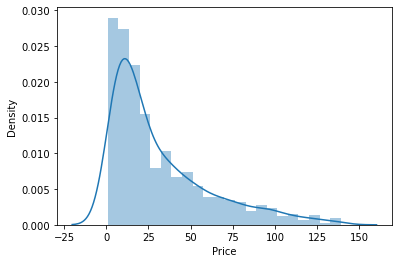

In [15]:
sns.distplot(pricesWithEncode2['Price'])

<AxesSubplot:>

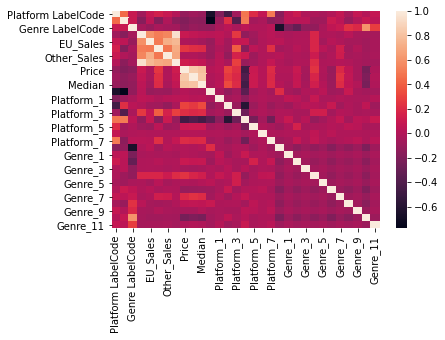

In [16]:
sns.heatmap(pricesWithEncode2.corr())

In [17]:
X = pricesWithEncode2[['Platform_0', 'Platform_1', 'Platform_2', 'Platform_3', 'Platform_4', 'Platform_5', 
                      'Platform_6', 'Platform_7','Genre_0', 'Genre_1', 'Genre_2', 'Genre_3', 'Genre_4', 
                      'Genre_5', 'Genre_6', 'Genre_7', 'Genre_8', 'Genre_9', 'Genre_10', 'Genre_11', 
                      'NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales', 'Global_Sales']]
y = pricesWithEncode2['Price']

## Train, Test, Split

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

##  Creating and  Training the Model

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lm = LinearRegression()

In [22]:
lm.fit(X_train,y_train)

LinearRegression()

## Model Evaluation

In [23]:
# print the intercept
print(lm.intercept_)

44.9176717936045


In [24]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Platform_0,-7.307885
Platform_1,-0.481190
Platform_2,11.798177
Platform_3,7.031359
Platform_4,-21.432585
Platform_5,6.765064
Platform_6,-4.468596
Platform_7,8.095656
Genre_0,1.559579
Genre_1,4.251632


## Model Predictions

In [25]:
predictions = lm.predict(X_test)

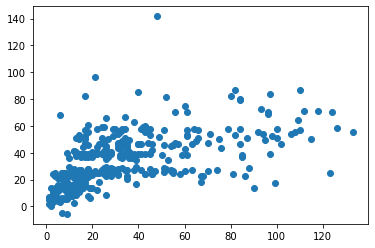

In [26]:
plt.scatter(y_test,predictions)

/Users/michelle/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


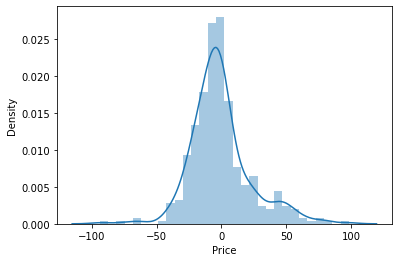

In [27]:
sns.distplot((y_test-predictions),bins=30);

## Regression Evaluation Metrics

In [28]:
from sklearn import metrics

In [29]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 16.53998725476542
MSE: 546.1633866995953
RMSE: 23.370138782206563


## Summary of Analysis

The data was run through the model first with just the sales features and the MAE was 20. Next, the Platform category was encoded and using that, the MAE dropped to 19. Finally, adding the encoded Genre category dropped the MAE to 16.53.